## Titanic Project
Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
 
Target: Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

### Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import os
import scipy as stats
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

### Importing the DataSet

In [3]:
df=pd.read_csv(r'C:\Users\Lewnovo\titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Observations: The dataset contains 12 columns and 891 rows. Both numerical and categorical values are present. Survived column
is the 'Label' and rest are the features.    

Categorical features: In the dataset Survived, Sex and Embarked have categorical data also Pclass has the ordinal data.

Numerical features: Here Age and Fare are continuous data, SibSp and Parch are discrete data.
    

## Exploratory Data Analysis

In [5]:
#checking the dimension of the dataset
df.shape

(891, 12)

The dataset contains 891 rows and 12 columns. In this 12 columns there are 11 features and 1 label "Survived".

In [6]:
#checking the types of the dataset
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Observations: There are three different types of features namely, int64, object and float64.

In [7]:
#Checking the overview of the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observations: Brief information about the dataset which includes indexing type, column type, no-null values and memory usage.

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observations: 
    
Age column has 177 null values and Cabin columnn has 687 null values

<AxesSubplot:>

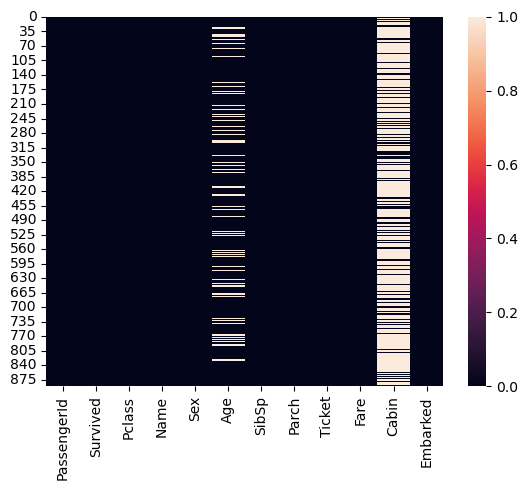

In [10]:
sns.heatmap(df.isnull())

We can cleary see the white lines for the columns with null values

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
#Checking uniqueness of the label
df['Survived'].unique()

array([0, 1], dtype=int64)

The unique occurrence in the target variable. As we can see in the label there are two unique values that is 0 = No and 1 = Yes and this target variable has integer datatype.

In [13]:
#Checking the counts of unique numbers of label
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Observation: Two classes in the label,0 and 1 in which 0 has 549 passengers who are not survived and the class 1 has 342 passengers who did survived. We can also observe that the data is not balanced.

## Statistical Analysis of the Dataset

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations: The statistical overview is only showing the data of the columns with the numerical data. Others have datatype 'object' hence not being displayed. 

What we can observe from the data is that, the data seems to have outliers and imbalabnced datatype. We can say that because, column'Fare', has 0 min and 512 max. 

## Data Visualization

### Uni-Variate Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

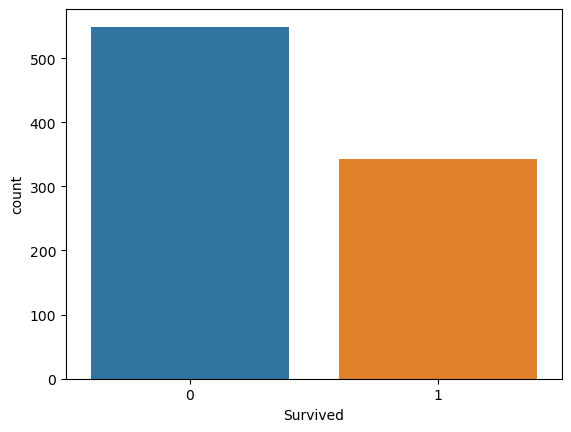

In [15]:
#visualizing the count of survivors

sns.countplot(df['Survived'])

Observation: 1 type passangers shows to be less survived. Also it shows that the data is imbalanced.  Since it is our target variable so we need to treat this class imbalancing issue using oversampling or downsamplimg before building our machine learning models.

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

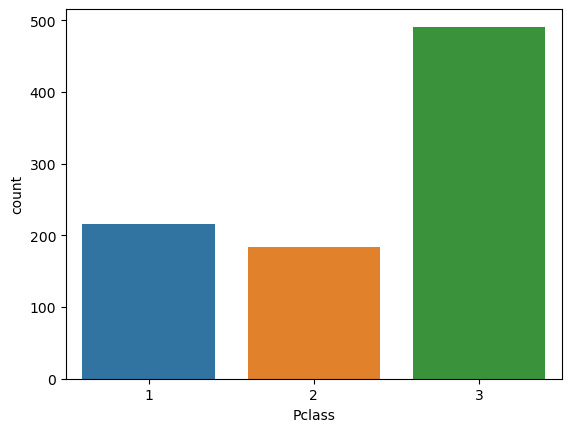

In [16]:
#checking the survival rate in passenger class
print(df['Pclass'].value_counts())
sns.countplot(df['Pclass'])

Observation: It is observed that in comparision to all the three classes, the 3rd(lower)class passangers are more likely, not to survive compared to class 1 and class 2. Also it is seen that the number of passangers in class 1 in compatevily lower then the other two.

male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

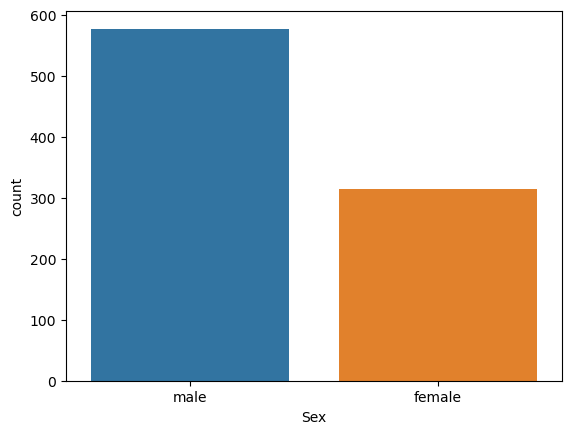

In [17]:
#checking the counts for sex feature
print(df['Sex'].value_counts())
sns.countplot(df['Sex'])

Observation: Male passangers count (577) are comparitively high to female passengers(314). So it clearly denotes that the survival rate of female passengers are higher then men.

S    644
C    168
Q     77
Name: Embarked, dtype: int64


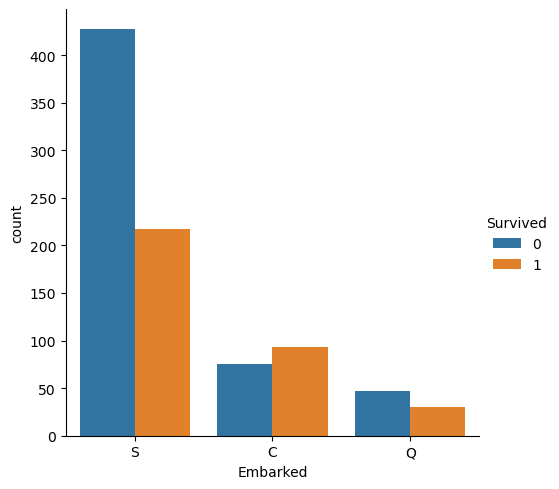

In [18]:
#checking the counts of embarked
print(df['Embarked'].value_counts())
sns.factorplot('Embarked', kind='count', data=df, hue='Survived')

Observations: Embarked feature has 3 value counts namely S=Southampton, C=Cherbourg and Q=Queenstown. These are the places where the passengers are boarded from. From the plot we can see that majority of passengers boarded from "S" and "Q" has less passengers.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


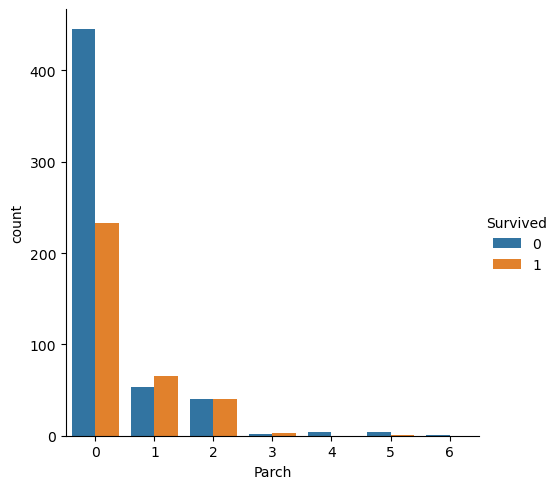

In [19]:
#Checking the count in the Parched

print(df["Parch"].value_counts())
sns.factorplot('Parch',kind='count',data=df,hue='Survived')

From this plot we can see most of the passengers are travelled alone which is named as 0 in the plot. We can say almost 80% of the passengers are alone, 15% of the passengers are travelled either with their children or parents and remaining 5% of them are travelled with group.

## Distribution of Skewness

<AxesSubplot:xlabel='Age', ylabel='Density'>

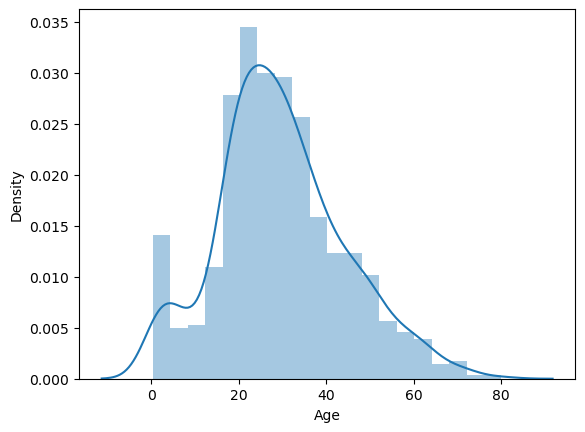

In [20]:
#Checking how the dataset is distributed

sns.distplot(df["Age"])

Data looks to be normal and there is no skewness

In [21]:
Dsns.distplot(df['Fare'])

NameError: name 'Dsns' is not defined

Data is not normally distributed and has skewness

## Bivariate Analysis

<AxesSubplot:title={'center':'Comparision between Pclass and Age'}, xlabel='Pclass', ylabel='Age'>

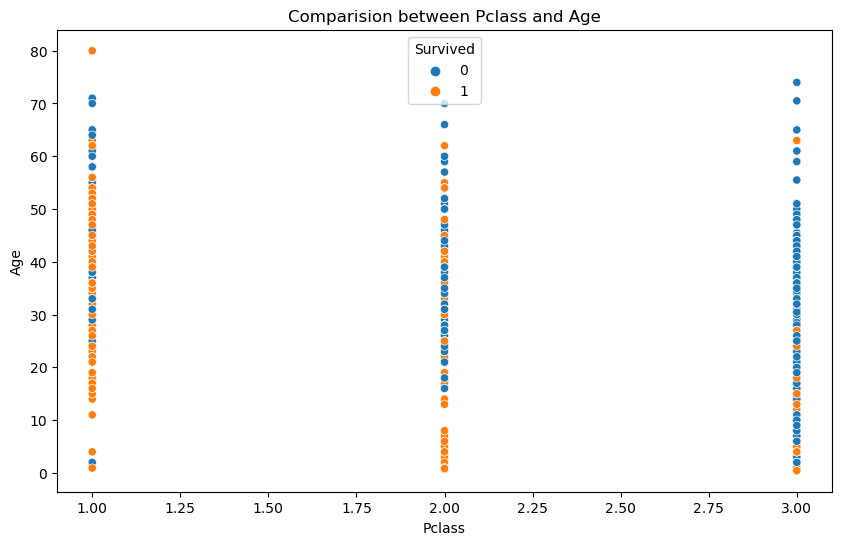

In [22]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Pclass and Age')
sns.scatterplot(df['Pclass'],df['Age'],hue=df["Survived"])

This is the comparision between the Age and Pclass on the basis of target variable. The orange dots are all the passengers who are dead and blue dots are the passengers who are survived. As we can see in the plot, the passengers travelled in the 1st(Upper) class who were aged 5 to 25 and 40 to 55 are survived. Most of the passengers who travelled in the 2nd(Middle) class whose age between 15 to 60 were dead and only few passengers survived. Most of the passengers of all the age, who were travelled in the 3rd class are dead compared to the other two classes.

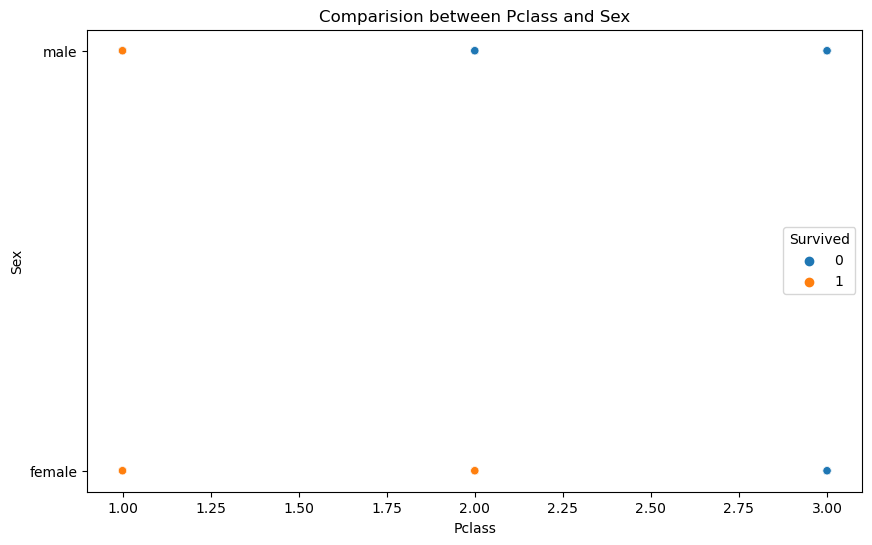

In [23]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Pclass and Sex')
sns.scatterplot(df['Pclass'],df['Sex'],hue=df["Survived"]);

This plot gives the comparision between the Pclass and Sex. As we can see both male snd female passengers who were in the 1st class were survived. In the 2nd class only female passengers were survived but not male. And in the 3rd class both male and female passengers were dead.

<AxesSubplot:title={'center':'Comparision between Sex and Parch'}, xlabel='Sex', ylabel='Parch'>

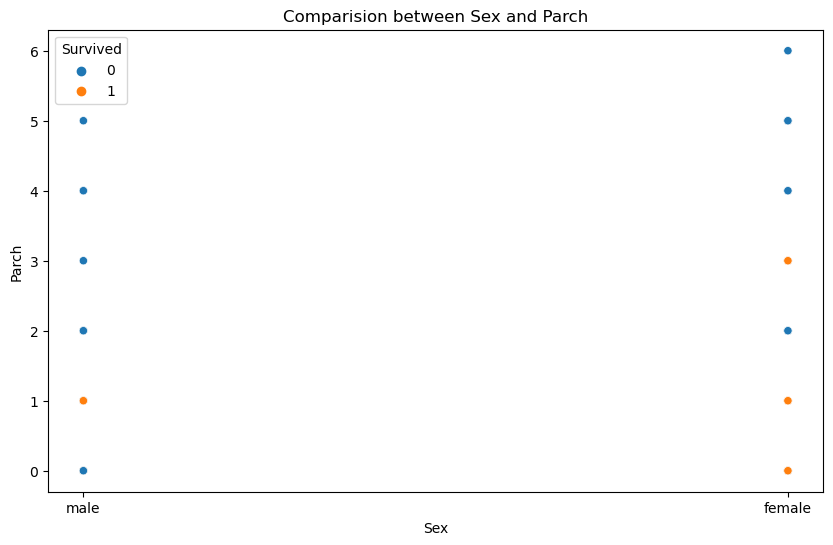

In [24]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Sex and Parch')
sns.scatterplot(df['Sex'],df['Parch'],hue=df["Survived"])

The above plot gives the comparision between the features Sex and Parch on the basis of label Survived. Most of the passengers have the relation to each other. There are only few passengers survived both male and female.

<AxesSubplot:title={'center':'Comparision between Age and Embarked'}, xlabel='Embarked', ylabel='Age'>

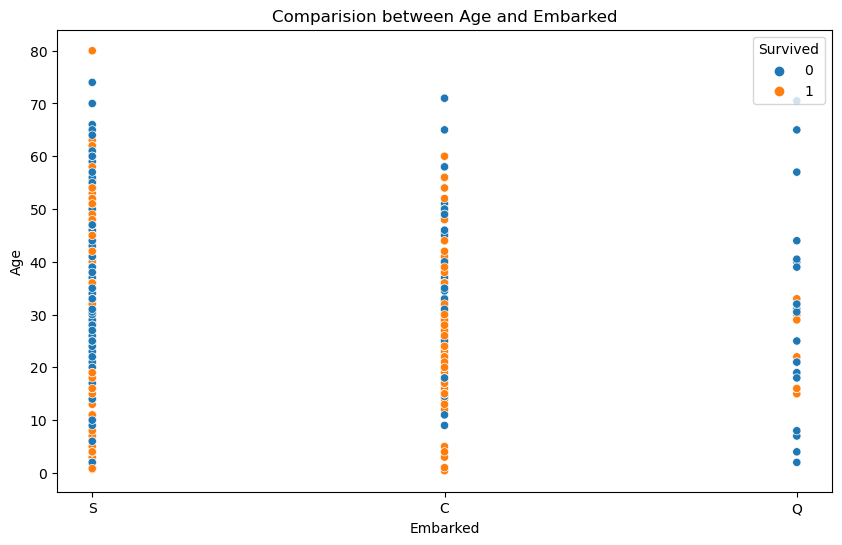

In [25]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Age and Embarked')
sns.scatterplot(df['Embarked'],df['Age'],hue=df["Survived"])

The passengers who embarked for Southampton(S) (age between 20 to 40) are dead. Most of the passengers who embarked for Cherbourg(C) were survived compared to S and Q. And only few passengers survived who embarked for Queenstown(Q).

<AxesSubplot:title={'center':'Comparision between Age and Fare'}, xlabel='Age', ylabel='Fare'>

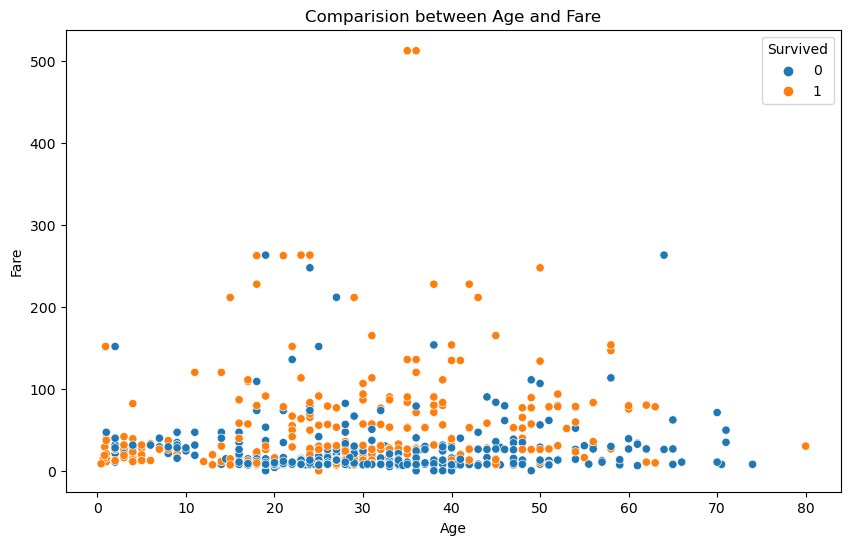

In [26]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Age and Fare')
sns.scatterplot(df['Age'],df['Fare'],hue=df["Survived"])

This gives the comparision between the Age and Fare on the basis of label Survived. Here the children(0-8 yrs) who paid less Fare have the high survival chance but for the passengers whose age is between 20 to 50 and paid more Fare their survival chance being increase. So it can be concluded that if a passenger paid a higher fare then the survival rate is more.

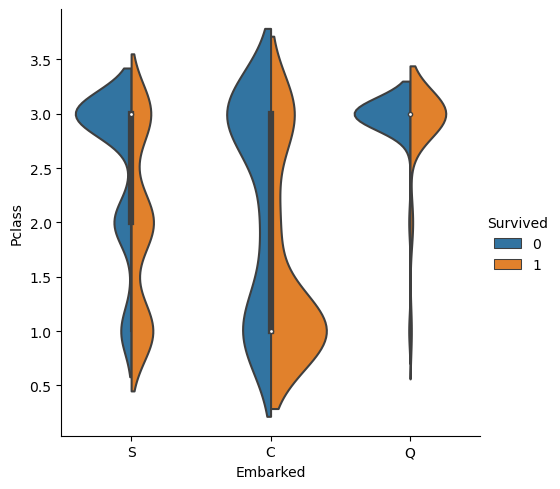

In [27]:
# Let's plot catplot for Embarked and Pclass
sns.catplot(x = "Embarked", y = "Pclass", hue = "Survived", kind = "violin", data=df, split=True)

From this violin graph we can see the majority of passengers boarded from S and it looks good that the survival rate is high than compared to Q and C. The survival rate is high for 1st class passengers boarded from C and it is decreased for 2nd class. And the passengers in 3rd class who embarked from Q have less survival rate.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

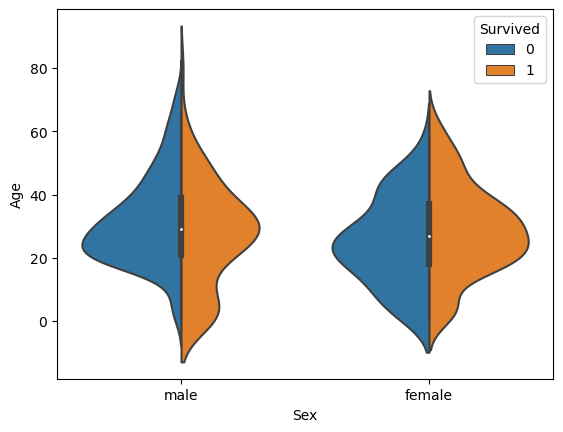

In [28]:
# Let's plot violinplot for Age and Sex
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True)

This gives the age summary of men, women and the children who were saved from the disaster. Here we can see the survival rate of children is good and it is high for the women in the age range 20-50 and less for men as the age increases.

## Multi-Variate Analysis

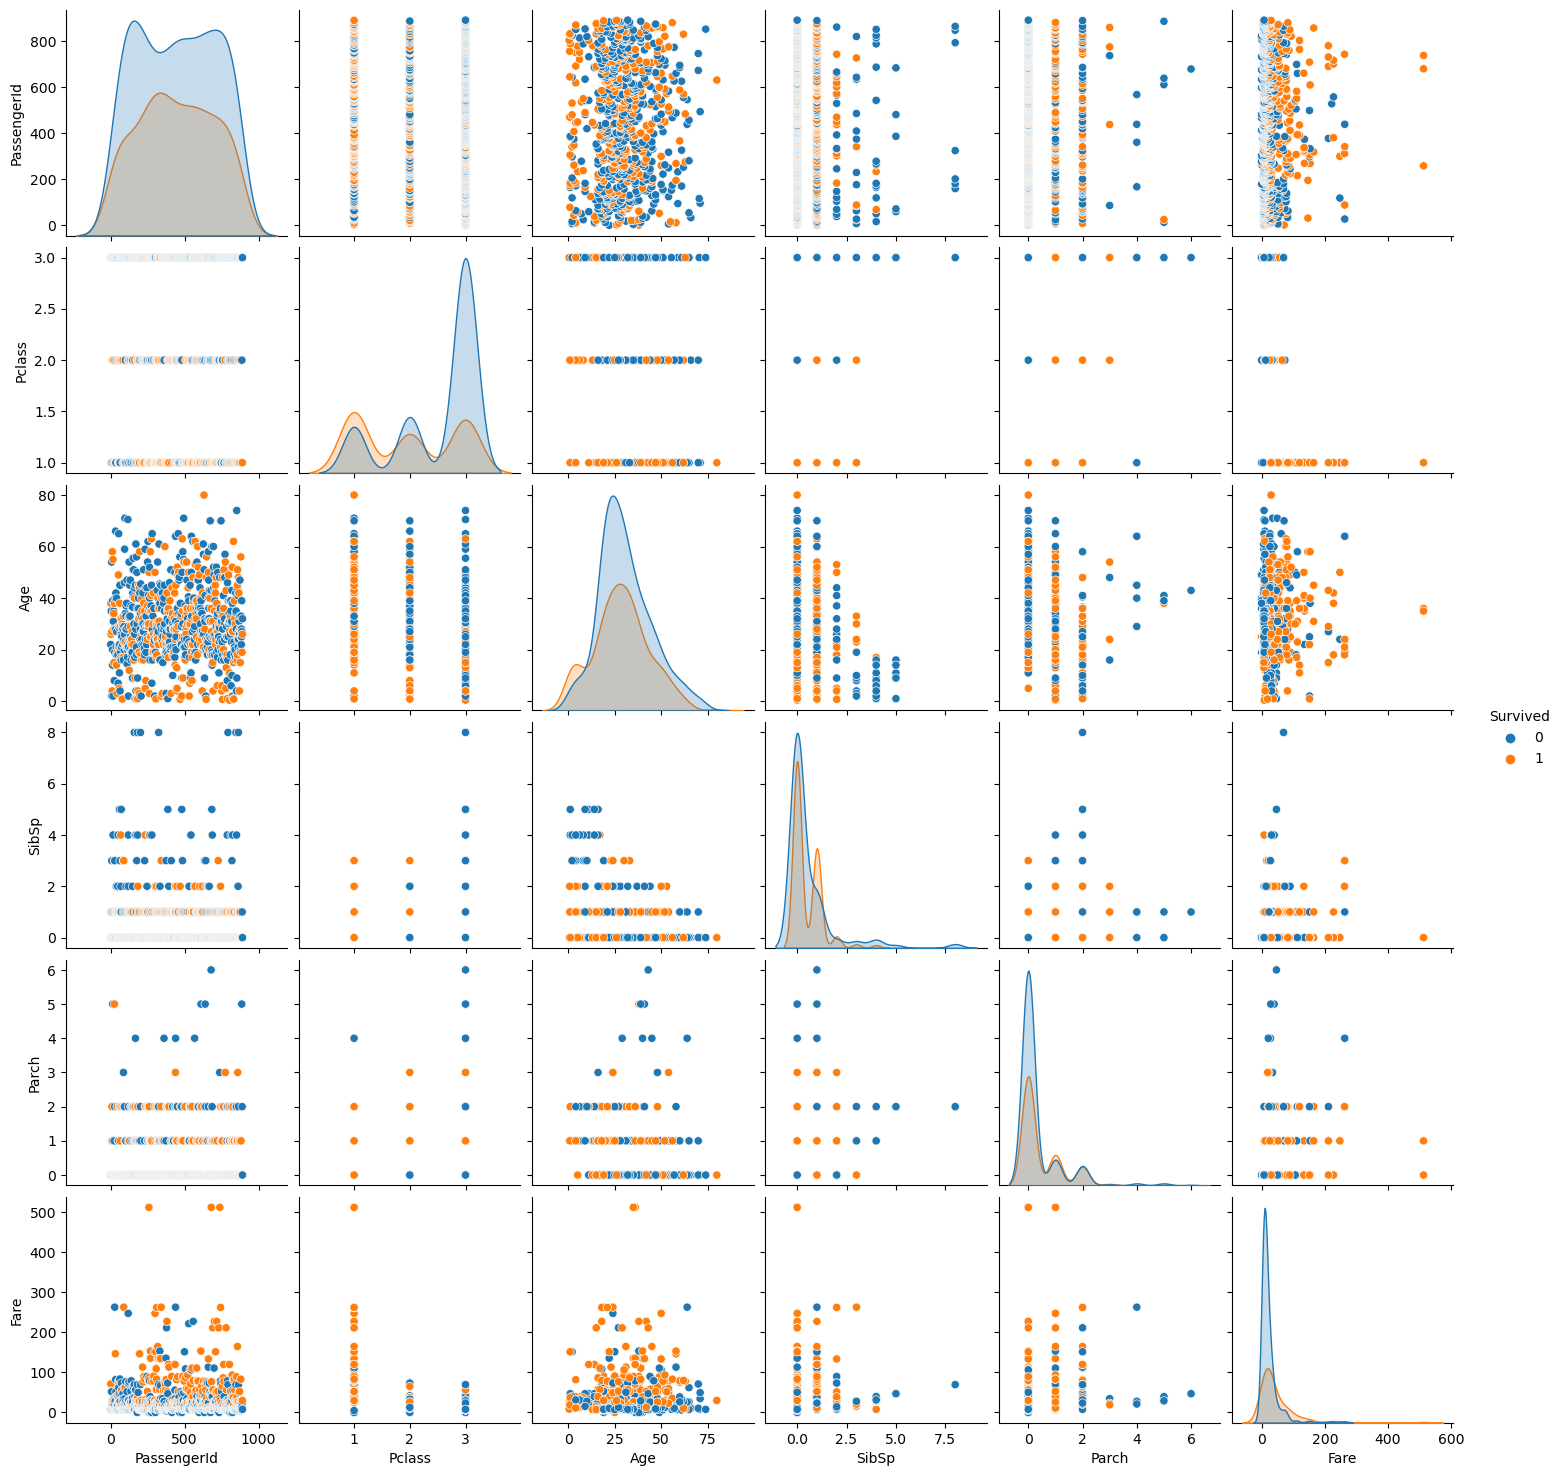

In [29]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Survived")

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'Survived'.

From this pairplot we can observe that the correlation exists between two variables and on the diagonal we can see distribution plotting. We can see the features Age and PassengerId are highly correlated but PassengerId has no more importance in our dataset so I am going to ignore it.

## Correlation between the target variable and independent variables using HEAT map

In [30]:
cor = df.corr()
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'PassengerId'),
  Text(0, 1.5, 'Survived'),
  Text(0, 2.5, 'Pclass'),
  Text(0, 3.5, 'Age'),
  Text(0, 4.5, 'SibSp'),
  Text(0, 5.5, 'Parch'),
  Text(0, 6.5, 'Fare')])

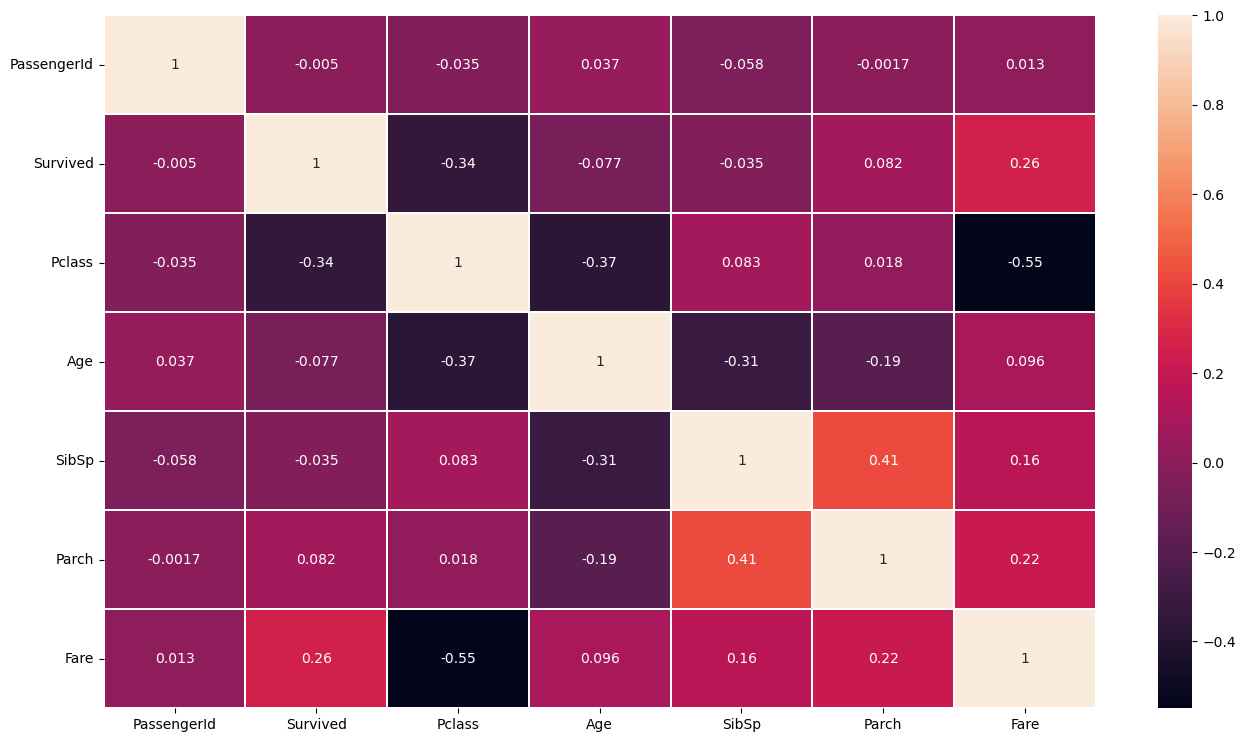

In [31]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0)

This heat map contains both positive and negative correlation.

We can observe that the feature column Parch and Fare are positively correlated with the target variable "Survived". Pclass is highly negatively correlated with the target variable "Survived". Also the columns SibSp, Age and PassengerId are negatively correlated with the label. The feature columns SibSp and Parch are positively correlated with each other. Light shades are highly correlated. Dark shades are less correlated. Also there are some independent variables which shows highly negative correlattion between each other. So we can check the multicollinearity problem using VIF if necessary.

In [32]:
cor['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

## Visualizing the correlation between label and features using bar plot

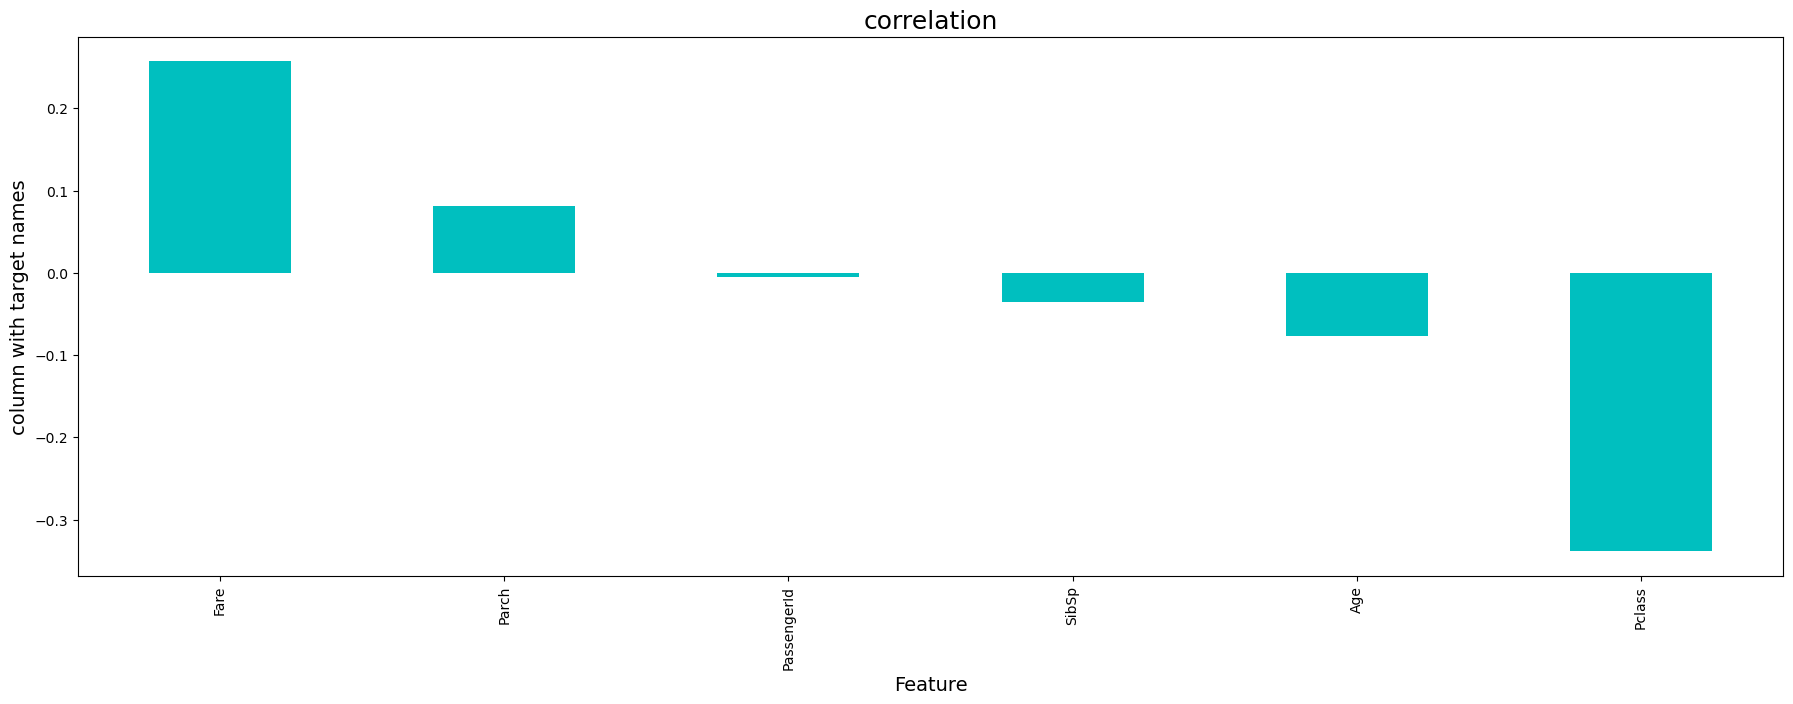

In [33]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Here we can easily observe the correlation.

From the heat map we can also observe that the PassengerId column has no relation with the target variable, so we can drop that column.

## Dropping irrelevant column

In [34]:
# Dropping PassengerId column
df.drop('PassengerId', axis=1, inplace = True )
df.drop('Name',axis=1, inplace=True)   # Name has no important to build our madel

In [55]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## Identifying the Outliers

<AxesSubplot:xlabel='Age'>

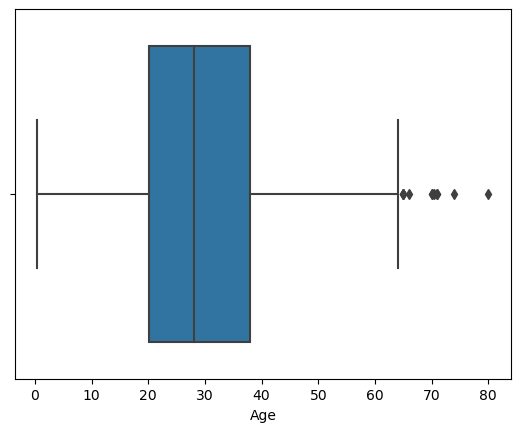

In [35]:
sns.boxplot(df["Age"])

As we can see there are outliers present in the Age column.

<AxesSubplot:xlabel='Fare'>

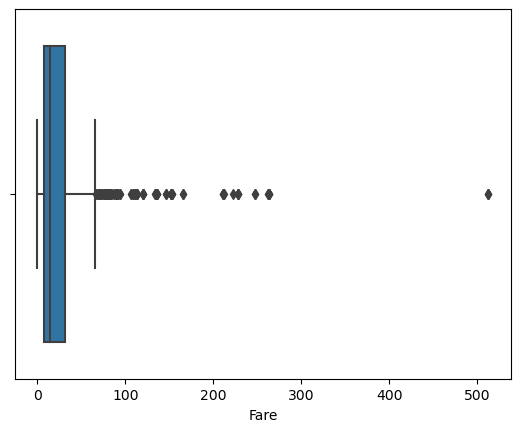

In [36]:
sns.boxplot(df["Fare"])

Contains outliers

<AxesSubplot:xlabel='SibSp'>

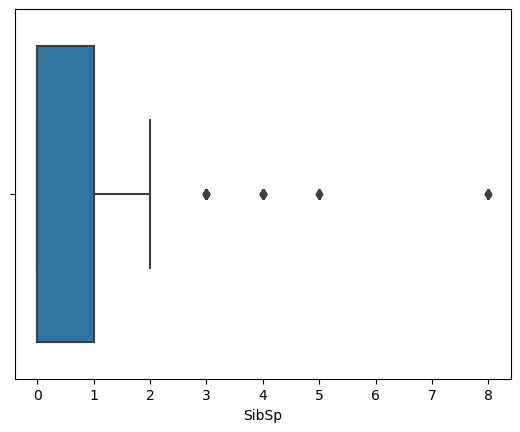

In [37]:
sns.boxplot(df["SibSp"])

Contains outliers

<AxesSubplot:xlabel='Parch'>

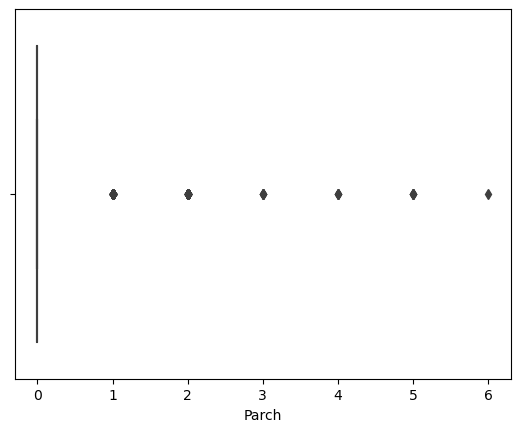

In [38]:
sns.boxplot(df["Parch"])

Contains outliers

## Data Cleaning

In [39]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [40]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df['Cabin'] = df['Cabin'].fillna('U')
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Null values has been treated

<AxesSubplot:>

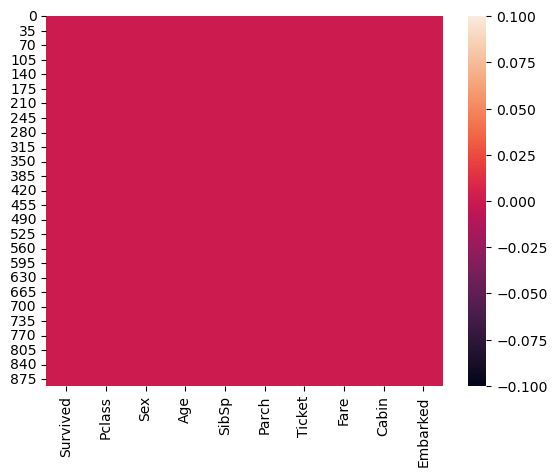

In [42]:
sns.heatmap(df.isnull())

It can be clearly seen that the null values has been treated

## Removing Outliers

### ZScore Method

In [43]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [44]:
variables = df[['Age','Fare']] # Removing outliers from only these two featuers as the other two are discreate.

In [45]:
z=np.abs(zscore(variables))

z

,Age,Fare
0,0.565736,0.502445
1,0.663861,0.786845
2,0.258337,0.488854
3,0.433312,0.420730
4,0.433312,0.486337
...,...,...
886,0.181487,0.386671
887,0.796286,0.044381
888,0.104637,0.176263
889,0.258337,0.044381


Outliers has been removed

In [46]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,U,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,U,S


In [47]:
new_df.shape

(864, 10)

In [48]:
#Checking Skewness

In [49]:
new_df.skew()

Survived    0.502011
Pclass     -0.708375
Age         0.321096
SibSp       3.751753
Parch       2.840412
Fare        2.257178
dtype: float64

We can observe the features Pclass, SibSp, Parch and Fare has skewness. Since Pclass is categorical column so we should not remove skewness. Let's remove skewness in Age, SibSp, Parch and Fare which contains numerical data.

## Removing Skewness using yeo-johnson method

In [50]:
skewed_features = ["SibSp","Parch","Fare"]

In [51]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [52]:
new_df[skewed_features] = scaler.fit_transform(new_df[skewed_features].values)
new_df[skewed_features].head()

,SibSp,Parch,Fare
0,1.374574,-0.548637,-0.882769
1,1.374574,-0.548637,1.529038
2,-0.680931,-0.548637,-0.792444
3,1.374574,-0.548637,1.216581
4,-0.680931,-0.548637,-0.776493


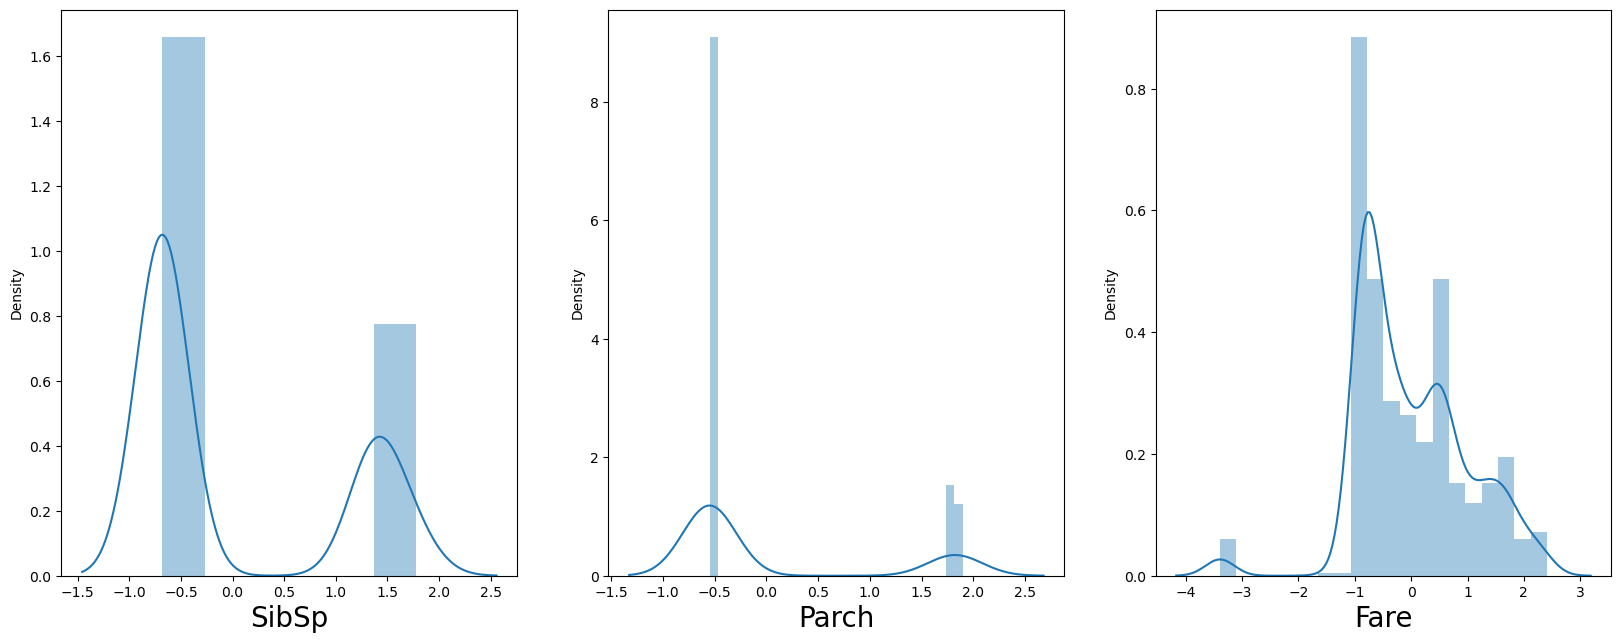

In [53]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[skewed_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    


The data is not normal but the skewness has got removed compared to the old data.

In [54]:
# Now let's check the skewness
new_df.skew().sort_values()

Pclass     -0.708375
Fare       -0.009095
Age         0.321096
Survived    0.502011
SibSp       0.805038
Parch       1.277888
dtype: float64

## Encoding the data using Label Encoding

In [55]:
cols = ["Sex", "Ticket", "Cabin", "Embarked"]

In [56]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[cols]= new_df[cols].apply(LE.fit_transform)

In [57]:
new_df[cols].head()

,Sex,Ticket,Cabin,Embarked
0,1,517,135,2
1,0,587,70,0
2,0,655,135,2
3,0,48,48,2
4,1,466,135,2


Object type data has been converted to numerical data

# Preprocessing the Data

### Separating the independent and target variables into x and y

In [58]:
x = new_df.drop("Survived", axis=1)
y = new_df["Survived"]

In [59]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,1.374574,-0.548637,517,-0.882769,135,2
1,1,0,38.0,1.374574,-0.548637,587,1.529038,70,0
2,3,0,26.0,-0.680931,-0.548637,655,-0.792444,135,2
3,1,0,35.0,1.374574,-0.548637,48,1.216581,48,2
4,3,1,35.0,-0.680931,-0.548637,466,-0.776493,135,2


In [60]:
y.value_counts()

0    537
1    327
Name: Survived, dtype: int64

## Oversampling

In [61]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 226.0/226.0 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [62]:
# Balancing the data using oversampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [63]:
# Checking the value counts again
y.value_counts()

0    537
1    537
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

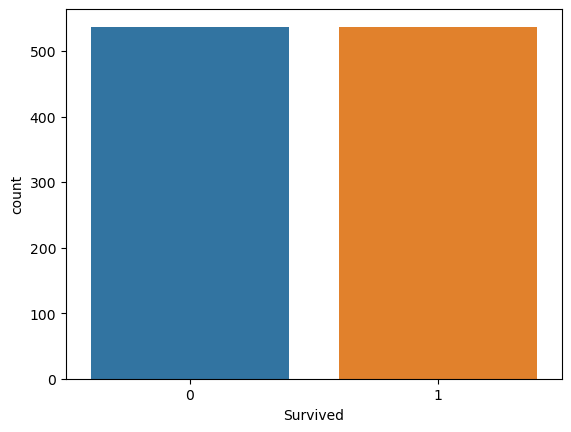

In [64]:
# Visualizing the data after oversampling
sns.countplot(y)

So by visualization we can see the data is balanced by increasing the number of survival rate.

## Scaling data using Min-Max Scaler

In [65]:
x.shape, y.shape

((1074, 9), (1074,))

In [66]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [67]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,1.0,0.329064,0.83479,0.0,0.776276,0.432617,1.000000,1.0
1,0.0,0.0,0.573041,0.83479,0.0,0.881381,0.848336,0.518519,0.0
2,1.0,0.0,0.390058,0.00000,0.0,0.983483,0.448186,1.000000,1.0
3,0.0,0.0,0.527295,0.83479,0.0,0.072072,0.794478,0.355556,1.0
4,1.0,1.0,0.527295,0.00000,0.0,0.699700,0.450936,1.000000,1.0


In [68]:
x.shape,y.shape

((1074, 9), (1074,))

# Modelling

## Finding the best random state

In [69]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.848297213622291  on Random_state  22


The best accuracy score is 86% at a random state of 90

## Creating train-test split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [71]:
x.shape, y.shape

((1074, 9), (1074,))

### Logistic Regression

In [72]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.8173374613003096
[[124  32]
 [ 27 140]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       156
           1       0.81      0.84      0.83       167

    accuracy                           0.82       323
   macro avg       0.82      0.82      0.82       323
weighted avg       0.82      0.82      0.82       323



Here we are getting 81% accuracy using Logistic Regression.

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

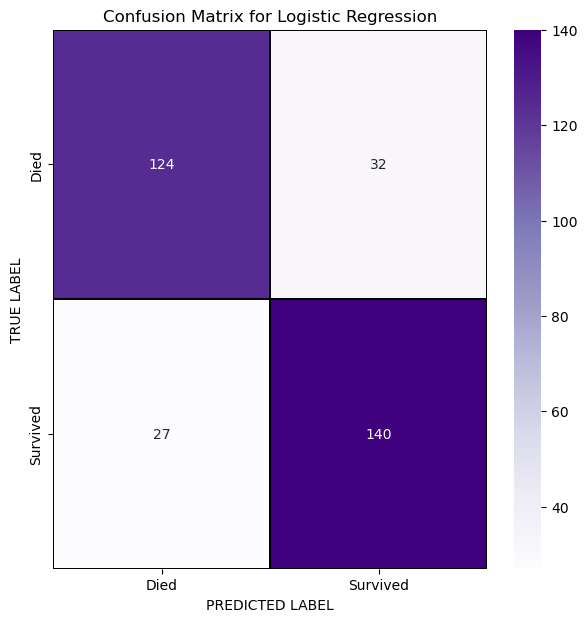

In [73]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')

From the plot we can easily observe the predicted values and true values.

True-Positive = 129
False-Positive = 27
False-Negative = 34
True -Negative = 133

## Decision Tree Classifier

In [74]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.848297213622291
[[134  22]
 [ 27 140]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       156
           1       0.86      0.84      0.85       167

    accuracy                           0.85       323
   macro avg       0.85      0.85      0.85       323
weighted avg       0.85      0.85      0.85       323



Here we are getting 83% accuracy using Decision Tree Classifier.

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

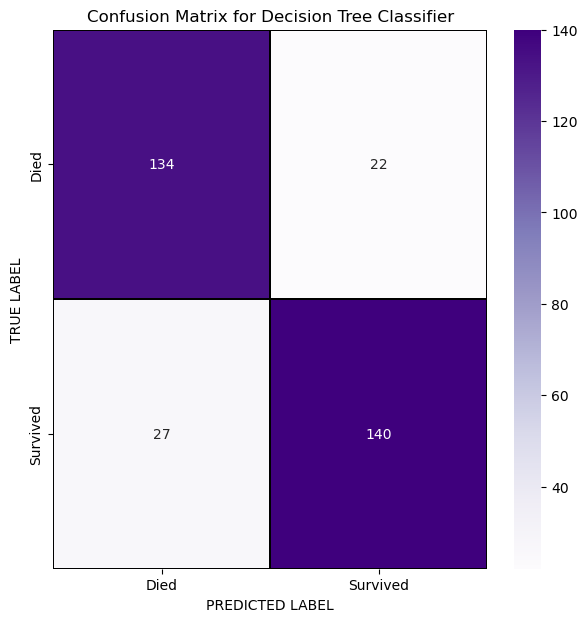

In [75]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

From the plot we can easily observe the predicted values and true values.

True-Positive = 140
False-Positive = 26
False-Negative = 28
True -Negative = 139

## Random Forest Classifier

In [76]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8452012383900929
[[138  18]
 [ 32 135]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       156
           1       0.88      0.81      0.84       167

    accuracy                           0.85       323
   macro avg       0.85      0.85      0.85       323
weighted avg       0.85      0.85      0.85       323



Here we are getting 86% accuracy using Random Forest Classifier.

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

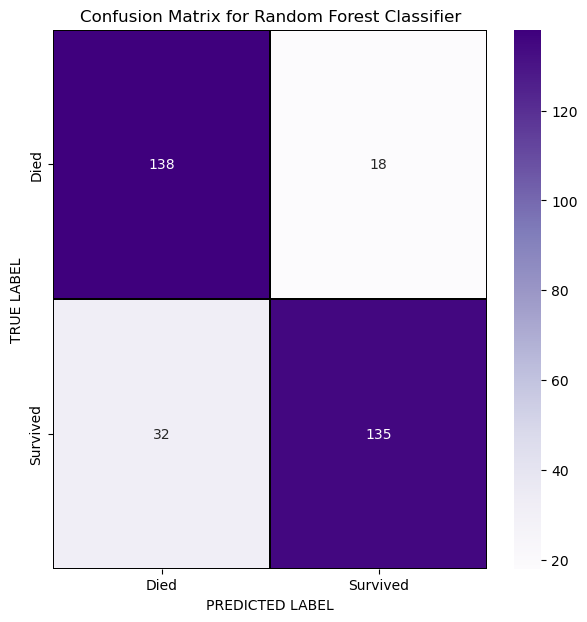

In [77]:
# Lets plot confusion matrix for Random Forest Classifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')

From the plot we can easily observe the predicted values and true values.

True-Positive = 133
False-Positive = 23
False-Negative = 21
True -Negative = 146

## Support Vector Machine Classifier

In [78]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8390092879256966
[[137  19]
 [ 33 134]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       156
           1       0.88      0.80      0.84       167

    accuracy                           0.84       323
   macro avg       0.84      0.84      0.84       323
weighted avg       0.84      0.84      0.84       323



Here we are getting 83% accuracy using Support Vector Machine Classifier.

Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine CLassifier')

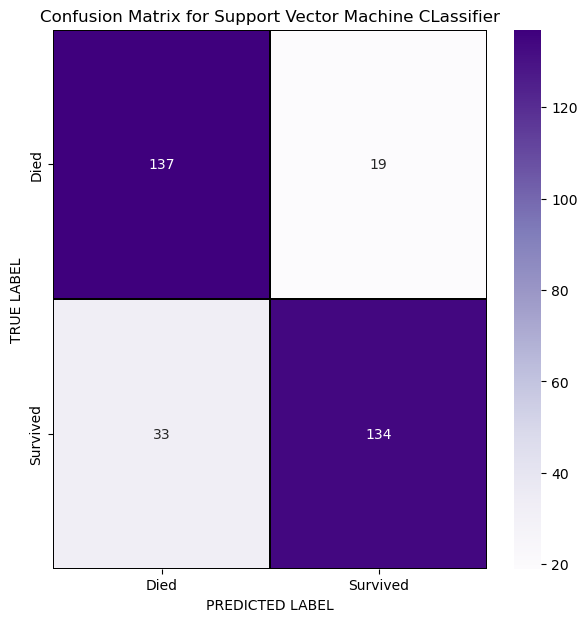

In [79]:
# Lets plot confusion matrix for SVC
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine CLassifier')

From the plot we can easily observe the predicted values and true values.

True-Positive = 133
False-Positive = 23
False-Negative = 31
True -Negative = 136

## KNN Classifier

In [80]:
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8235294117647058
[[134  22]
 [ 35 132]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       156
           1       0.86      0.79      0.82       167

    accuracy                           0.82       323
   macro avg       0.83      0.82      0.82       323
weighted avg       0.83      0.82      0.82       323



Here we are getting 84% accuracy using KNN Classifier.

Text(0.5, 1.0, 'Confusion Matrix for  KNN classifier')

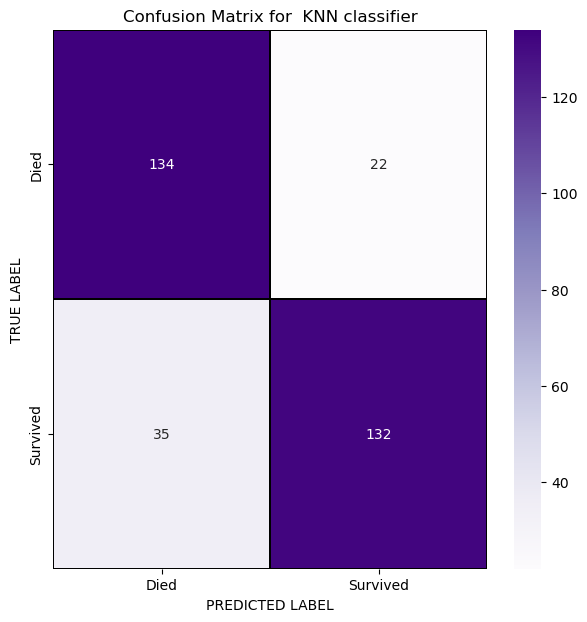

In [81]:
# Lets plot confusion matrix for KNN classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  KNN classifier')

From the plot we can easily observe the predicted values and true values.

True-Positive = 132
False-Positive = 24
False-Negative = 29
True -Negative = 138

## Gradient Boosting Classifier

In [82]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8359133126934984
[[133  23]
 [ 30 137]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       156
           1       0.86      0.82      0.84       167

    accuracy                           0.84       323
   macro avg       0.84      0.84      0.84       323
weighted avg       0.84      0.84      0.84       323



Here we are getting 86% accuracy using Gradient Boosting Classifier.

Text(0.5, 1.0, 'Confusion Matrix for  Gradient Boosting classifier')

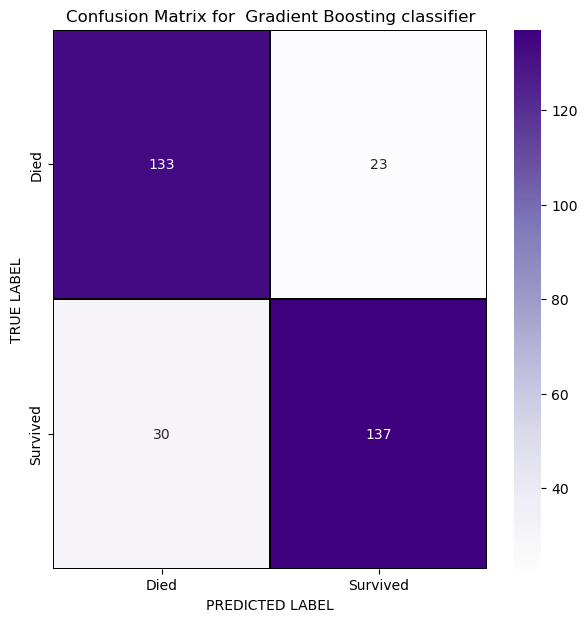

In [83]:
# Lets plot confusion matrix for Gradient Boosting classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Gradient Boosting classifier')

From the plot we can easily observe the predicted values and true values.

True-Positive = 131
False-Positive = 25
False-Negative = 21
True -Negative = 146

## Checking the Cross Validation Score

In [84]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8026689850032602


In [85]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8566572484242556


In [86]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.8324538143881763


In [87]:
# cv score for Logistic Regression 
print(cross_val_score(LR,x,y,cv=5).mean())

0.7933405781351879


In [88]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.808215605303195


In [89]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.8464029558791566


From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Classifier is the best model.

## Hyper parameter tuning for best model

In [90]:
# Random Forest Classifier
parameters = {'n_estimators':[0,200],
             'criterion':['gini','entropy'],
             'max_depth':np.arange(2,50),
             'max_features':["auto","sqrt","log2"],
             'max_leaf_nodes':[10,20,30,40]}

In [91]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [133]:
  GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 27,
 'max_features': 'auto',
 'max_leaf_nodes': 40,
 'n_estimators': 200}

In [ ]:
Titanic_survived = RandomForestClassifier(criterion='gini',max_depth=27, max_features='sqrt', max_leaf_nodes=40, n_estimators=200)
Titanic_survived.fit(x_train, y_train)
pred = Titanic_survived.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

Here the final model gives 88% accuracy after tuning.

## Plotting ROC and compare AUC for all the models used

In [ ]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(GB,x_test,y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

## Plotting ROC-AUC curve for best model

In [ ]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
x,y = datasets.make_classification (random_state=87)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,random_state=87)
df = RandomForestClassifier(random_state=87)
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)
plt.show()

## Saving the model

In [ ]:
# Saving the model using .pkl
import joblib
joblib.dump(Titanic_survived,"Titanic.pkl")